### 1. Introduction
Market Basket Analysis (MBA) is a powerful data mining technique used to identify associations between different items purchased together. In the retail industry, understanding these associations can help businesses optimize their inventory, improve cross-selling strategies, and enhance customer satisfaction. This project leverages MBA on the Groceries Dataset to uncover patterns in customer purchasing behavior.

### 2. Business Objectives
###### Increase Sales: By understanding which products are frequently bought together, the store can create targeted promotions or bundle offers that encourage customers to buy more items in a single transaction.

###### Optimize Inventory Management: Insights from MBA can help in predicting demand for grouped products, enabling better stock management, reducing overstock or stockouts, and thus lowering holding costs.

###### Enhance Store Layout: Identifying frequently purchased combinations can inform the strategic placement of products in the store, making it easier for customers to find related items, thereby improving the shopping experience.

###### Personalized Marketing: The analysis can be used to create personalized marketing campaigns, such as recommending complementary products to customers based on their purchase history, increasing the likelihood of repeat purchases.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
df=pd.read_csv('Groceries_dataset.csv')

## Basic Checks

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [4]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,2014-10-08,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-12-03,fruit/vegetable juice
38764,1521,2014-12-26,cat food


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
df.describe(include='O')

,Date,itemDescription
count,38765,38765
unique,728,166
top,2015-01-21,whole milk
freq,96,2502


In [8]:
item=df.itemDescription.value_counts().head(10)
item

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
chicken              938
bottled water        933
sausage              924
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# EDA

<Axes: xlabel='Member_number', ylabel='Count'>

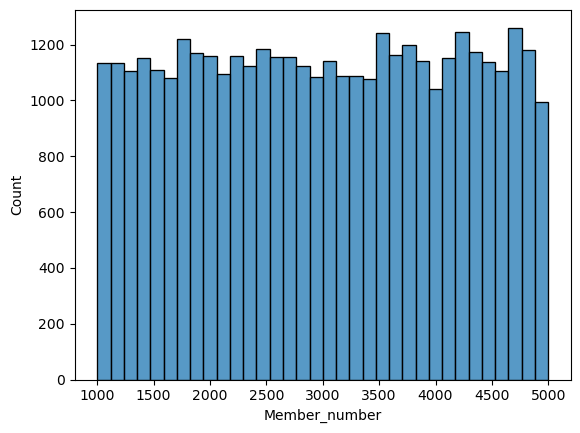

In [10]:
sns.histplot(df.Member_number)

<Axes: xlabel='itemDescription', ylabel='count'>

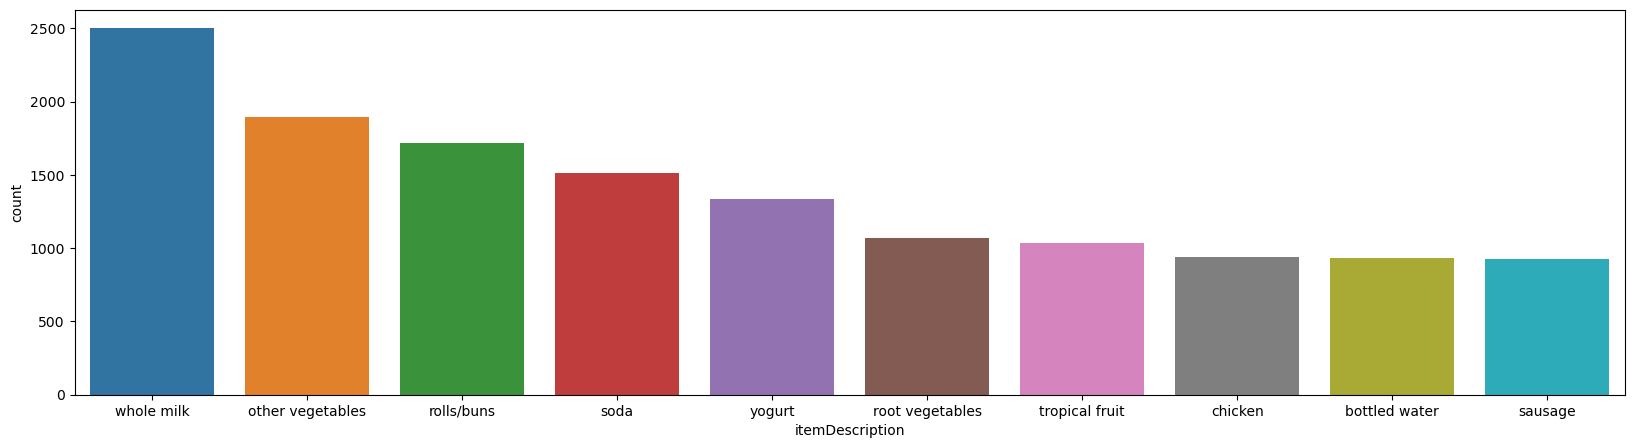

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(y=item,x=item.index)

In [12]:
df.Date=pd.to_datetime(df.Date)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [14]:
df1=df.set_index(['Date'])
df1

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

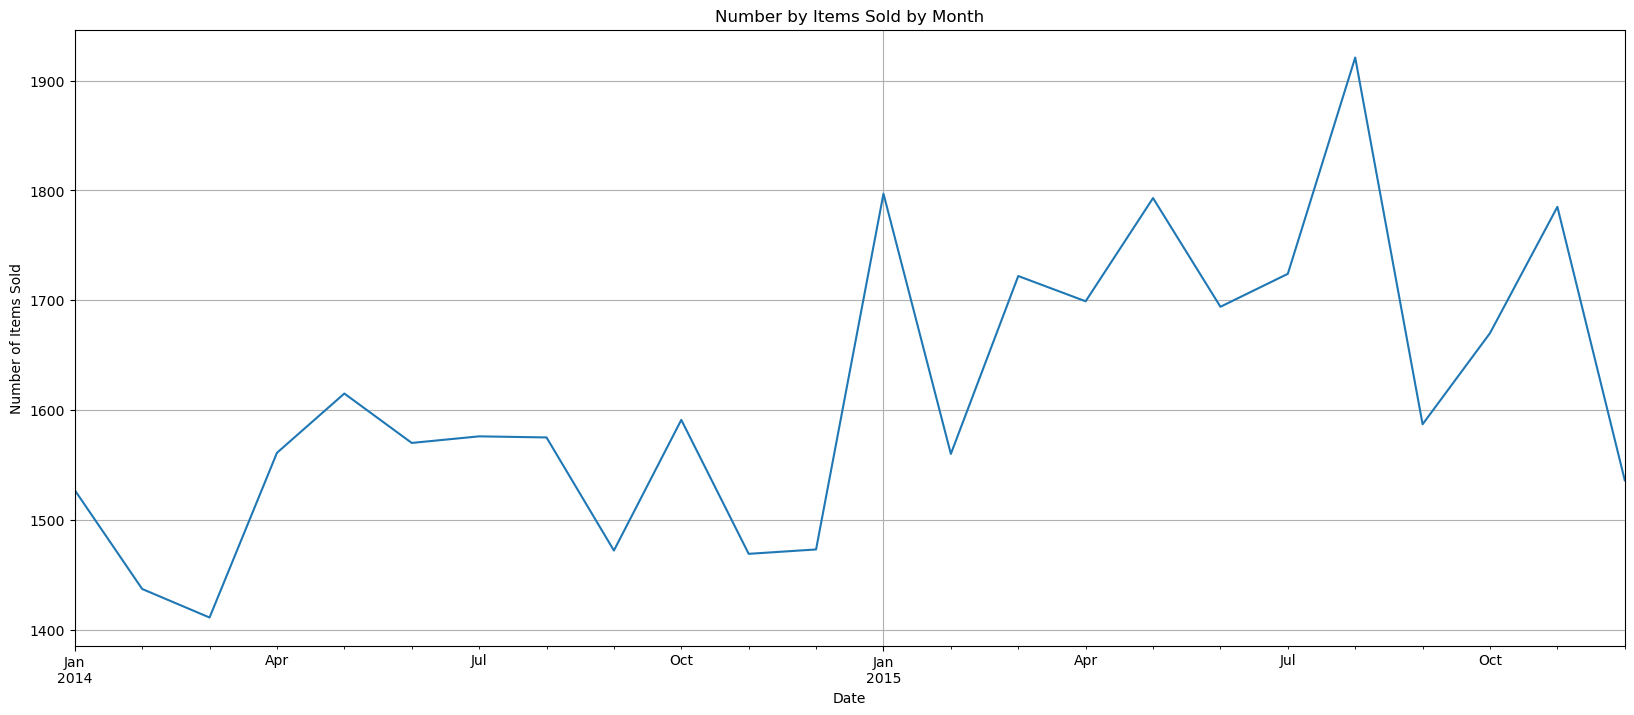

In [15]:
df1.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

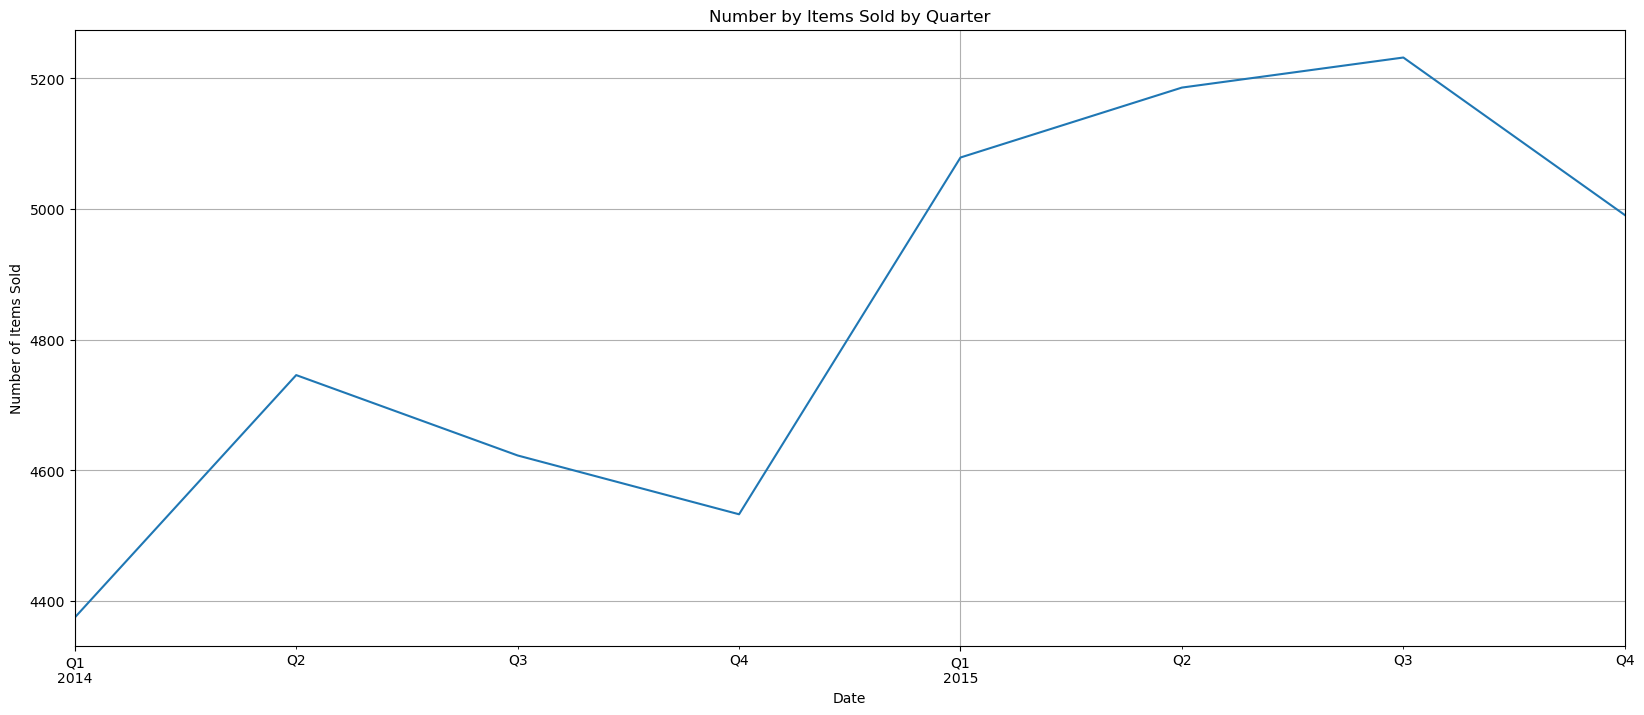

In [16]:
df1.resample("Q")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Quarter").set(xlabel = "Date", ylabel = "Number of Items Sold")

# Date Preprocessing

In [17]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [18]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer

# Model Creation

## Apriori Algorithm
The apriori() generates the most relevent set of rules from a given transaction data. It also shows the support, confidence and lift of those rules. These three measure can be used to decide the relative strength of the rules. So what do these terms mean?

Lets consider the rule X => Y in order to compute these metrics.



## Metrics for association rules mining

**1. Support**

**2. Confidence**

**3. Lift**

![main.png](data:image/png;base64,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAA4AAD/4QMtaHR0cDov%0AL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENl%0AaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4%0AOnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjMtYzAxMSA2Ni4xNDU2NjEsIDIwMTIvMDIvMDYtMTQ6%0ANTY6MjcgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5%0AOS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHht%0AbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6%0ALy9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUu%0AY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBo%0Ab3Rvc2hvcCBDUzYgKE1hY2ludG9zaCkiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6MTA1QUU5%0ANjA2Q0NDMTFFNzhBODRGNjJGNEIwREMzN0EiIHhtcE1NOkRvY3VtZW50SUQ9InhtcC5kaWQ6MTA1%0AQUU5NjE2Q0NDMTFFNzhBODRGNjJGNEIwREMzN0EiPiA8eG1wTU06RGVyaXZlZEZyb20gc3RSZWY6%0AaW5zdGFuY2VJRD0ieG1wLmlpZDoxMDVBRTk1RTZDQ0MxMUU3OEE4NEY2MkY0QjBEQzM3QSIgc3RS%0AZWY6ZG9jdW1lbnRJRD0ieG1wLmRpZDoxMDVBRTk1RjZDQ0MxMUU3OEE4NEY2MkY0QjBEQzM3QSIv%0APiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVu%0AZD0iciI/Pv/uAA5BZG9iZQBkwAAAAAH/2wCEAAcFBQUFBQcFBQcKBwYHCgwJBwcJDA4LCwwLCw4R%0ADAwMDAwMEQ4QEREREA4VFRcXFRUeHh4eHiIiIiIiIiIiIiIBBwgIDg0OGhISGh0XFBcdIiIiIiIi%0AIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIv/AABEIAZAClwMBEQAC%0AEQEDEQH/xAC6AAEAAgMBAQEAAAAAAAAAAAAABgcDBAUCAQgBAQADAQEAAAAAAAAAAAAAAAABAgME%0ABRAAAQQBAgMEBAsEBwYEBwAAAAECAwQFEQYhEgcxQRMUUWGRIoHRMkKS0iNUFVYXcaFSFmJyM0PT%0AlQixolOTJFWC4yVmc7M0RlcYKBEBAAIBAQUFBgUDAgUFAQEAAAECEQMhMUESBFFhcSIy8IGRwUIT%0AobHRUiPhMxRicvGSQ1M0gqLC0gWyFf/aAAwDAQACEQMRAD8A/SIAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABis2a9OCS1akbFBE1XSSPXRrUTtVVK2%0AtFYzKa1mZxDRwm48FuSCSzgr0V6GJ6xyPiXXlcncuuil+WcRPCVcxnHF0yEgBVRE1Xgid4GCrdqX%0AUkWpM2ZInrHIrF1RHp2t1HCJ7UZe3zwRLyySMYq8URzkRf3hJ48Hh+L4jPDX5/MnL7QPsc8MqqkU%0AjXqnbyuRdPYB7AxvsV4ncskrGO7dHORF0+EB5iukaSrKzw14I/mTl9oGCTK42GWGCS1E2Swqtgar%0Ak99zU1VEX0iNs4J2Rng2wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAD497Y2OkeujWoquVe5EItaIjMpiJmcQpnP7123v7f2J2ZFkopMFW%0AXzN1G83LassX7Kv2J8lU4opbpq817ak/RHljv429yvUW5aRWN952z3dnvTPbVrYLdx5efBZOObKy%0Atb5+sknuwsh4JpHytRrUIpb+OZj055pnvlN488RPqxyxHgkuJzeIztRb2HuRXKrXujdNC5HMRzPl%0AJr6iZiYiJnijO2Y4w5v8+7N8S7H+M1ebHprd9/hH/WXs9hWtomMxuWmJi3LxcDem4X5TLYTZGGsI%0A12dR1i7YYvvNoMTmdyehZEXRFFNOL6k1tHlpGZ754R+qLX5dLnrvtOKz+c+5NsbjqWJpQ47HxNhr%0AQN5Y429iJ8Ze1ptOZVrWIjCtuvGzKue2fbzcEKfi2Lak0c6K5HLCxeaSNdFTVFQ5bz9u9b4ztjMd%0AsOrS88TSezZ4vVGtgt47Jxm08JTjbQu1oprb2arHWbpxVrtf7VXIuh19TpTbUx9NJ3//ABj59ji6%0AfVmlM/Xbh859tqY7T2PtzZVNKmCreErmo2aw9yvll5e+Ry9qk21JnZw7Fq0iNvFIDNdUnXzaOOv7%0AZk3THV58ni3RyOkarkV9drvtI36Knu6GE2jT1K2n083mjty3rE3pamceWcT2N2xT25uTa2L2Zg8f%0AC+G9XisyRpzeHThciKsyqi/L115OPadetozbUxOyKcf/AIx7bHHo3mNKLRG2/tMz4fiktPpztSjt%0A1ds1qaMpuVHuejl8Xxm9k3OqqqPReOpTVtN92yY3dzTSjk787+9p9PNw2ryZTbWWm8fK4CwtaaZe%0A2WJeMUi+vTgWi33NOupjfsn/AHQi0cmpNOG+vhKalFgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAumi69neRO4hVXSqCPMbn3hu5Y2JDYve%0ATqLyInuV+1U+FS2hs6aszvvM2NfbrzXhSsR73P2tT/njfG7bUrP/AEZszaEr2IjUmjh4+C17fmqq%0ArzoZ9PSLdPzT9dpn28OC2vea60VjfWse7t+LHvahHtOjg+lGx1dSbuGy9LNhXKskddVRZeV3DtTg%0AWrnX1Y07T5aVzPfEcEWmNGltSPVa2I7MnU3BYSlQ2l04w9ZjZrl2Jvuf2jYIlRZnvXtXn79S9Lfd%0A6qs8KZtPhwUtHJ099u22zxmW3FEsHX+vDKiJHHg+Son9FuqLoT0tpmutM7+aEa8TEaMfTt+K3ii6%0AM7pvPyLJ9p4lrJsjchc2dXpzRVoXoqeLKnfr81veZamnOpSY4e2yPbY1pbkmLfBD/wDT+/yu17+3%0A52NZcxF+avPo3lV3HVr1T1nXbUjU0tO8buXHvhyzT7etevfn4rWMWoBDOreUhxPT3N2Jmo/xK7oG%0AMcmqK+X3Wpp+05epiZiKxvtaIdPTerPZEydKdsQ7Y2VjK3Ivm5oGS2pHcXue9ObTVe5EXgh6fUzE%0AW5Y3Q87p9teaeP4JmczoVRtDT9bN4+D8jytbxeXs59V+V6yOkz9m/Z9zZ8E9X/c0v9i1yUAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEty70s47LwbZ27jvxbPTs8%0Ad1d0ngwxQf8AElmVHcuvcmnErSZtaYiNld8/lHiteIrWJn6pxHzakG/cpUy+P23uLCvp5nJSL5dI%0AJPHqLC35b/MaN99ve3lNaRF7TWJ2xGZUvmtead0ziPHv7E4KJAAAAAAAAAGKO1Xlmkgjka6WLTxG%0AIuqt19IjbGfcTsnHFlAAAAEY3PuuhU25mbeNsR2bdJr63hMXVfNK3RkK/wBLVeww14m1IiPr2R72%0A2liL+b6ds+DU6cbXsbb2LUxUipDkZ43z2n6a6Tz6uVdPVqh19XHNHJWdkV5YcvTztm8x6rZdDY20%0A49mYGPDNmSzJ4kk09nk5PEklcrlcrdVItbMVjhWMLRE81rTvtOXN3tsKfc2UxGfxORTGZjDvc6vO%0A+JJ43Nd2tfGqt/2mVImmpN68YxPgvfFqcs8JzCJ4nEPyHWJj7lv8Rt4Kh4t60reVPMWdWpHGzVeR%0AjdNUbqadNMY1LRGI2Vj5qdRE406235m3u4JNvrDWauYxG+8ZXWxZw7nx3YWJq99OVNJVane5naiG%0AenaNPUmZ9N4xPynw7Wl4m+nyx6qzzR8497sXp8hunAxW9mZeKl5lNWXXQ+P7vYqIxXN0chOrp2ic%0AZx7cEad47Nvtvauzdq5vbWLuVchlY8lkbL3SpkXQckjnuTg6b33c+ha9pmkVjZMK19eZ2wj23Om+%0A79v7ovbkZuWCRMtM2TJ1Epcsb0b3R/aLyO07ydGYpTknbX5mrHNbm44x/wAU73Fr+BX9Ly41fAk/%0A9QRNVg91ftUT+j2mGru34a6XqjZlHumMebjwUn4vmXZ+FZnLQykjFY+WDRNHcVVVTXU69TdGYxOP%0AbPe549U4nMfP9HL6h9Ot0b8e2qu446OIilbPDSbU51V7OLfFfzpzIi+o59OJreL8azsb3mJpNeFo%0AxKb4Kpk6OLgqZe1HdtxNRr7EUXgtcicE0j1dp7TW9omcsaVmNhm83j9v46XJ5KTw4Ik7ETVznL2M%0AY1O1ymN7Y3bZndHa1rXPgjXTvb9mk3J7nysPg5TcFhbUsXfHDppFGvwcTaK/b066fZtn/dLO1ufU%0Am/DGK+EJqUWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACpuo+L%0A3PtXc0XVLa8f4hHBXStmMUvynV2rqskaprxQppakaU2i39u+/un9Gs6f3axEbL13d+eCUYXceB3x%0Aiqu88Ex1uzTZKyGsq8r45ZGoj45E46KaatbU2xt5tzDTvFvLbZidsOd033jntyWNx/jXgOp4u0sF%0AWxC3kaqNTV7VXVebl9JWtqx09dSZ2zn4Qm2fvzTHCPjLHt3dm4twbKzG5JLcGP8ADsWFx1h8HOxl%0AaDgivZzJza6Lx1M9ebU0K2+rHNP6NaRFte1I3ROI8e1w9t7x6l7o2NLuCB9Sg+uyWZt+xXXksJHr%0A7rIOb3WKifL5vgNOq/jrF92K5mPbcpoRz3mm/wA2M9kfNmu9Sc9b6Sw78o2IMbeiRUnjmg8eOaRr%0AuVGRJzN05l7FHVZpak13Xxs47f0R03n5onfXO3wY83vTqRj9kQb4clSjDXZFJPQswr4tlj9OZ3an%0Agu9DeJbqJjS1YztrNojH9TQidSmz1RWZz/RJM91MixmNwbaFN1zPbhSP8Pxiu5FTnRFc+V3HlY3X%0At0J1KT92dKu+N89kdquleJ0vuW2R+c9kOVkd1712RnMFFuq3VyePzthaixVoPAkrSO0Vqo7md4jU%0A107idLltqfb4zGYnw7jUi0U+5GyK748e9s53dm4sN1AqYdt6CfFWIJLElBtb/qGo1Ps42S83vOkd%0A6jLRmZm8Tt5cY8Z3L6seWsxsz+Ub5KWd6jS47dN3PwwYNlJVfiJVi8dqRNbzKrveb4nDv4cSmtbl%0A6eLZ88Tt8F9OvNrcv0TEY8fbgw9F6O7lwn8wbgybLceZc+35dYOWVrnryoqy83ydG8G6HZesUrFJ%0A3xEe3e5ovOpabcN3ujs7FiZO9+G0pbvlp7fhJr5eqzxJnepjNU1U5rWw3iMoqnUfX/7V3H/l/wD5%0AhZV1cDuv8dsvrfguVx3I3m8XIVfAjX1NdzO4lorsmVZnbh3ZJI4m88r2sb/E5URPapVZD62x9o1c%0A3YziWnyOsWPOOoyWGuqNs6InjMh04P4dupOnPJGI4bu7wRqRzzmff3+KV+epfeYvpt+MhJ56l95i%0A+m34wNe9JSvVJqnn/L+M1WePXmayVmvzmP46KVtXKaziUU2z0/2ztXN2M/QzN6e7cRUurautlZOv%0Ac6VvKmqp3GlLctOWNyt45pzO9M/PUV4LYi+m34yqWCquGpJIlR8EKSvWSRGOaiK9e12mozsiOxGG%0Afz1L7zF9NvxhJ56l95i+m34wPjrlByK108KtXgqK9qov7wDbmPY1GMnha1OxqPaiJ+8D756l95i+%0Am34wHnqX3mL6bfjA1rDcLbmgsWXV5ZayqsDnuavIrk0VU4iNk54k7YxwbTblNyo1s8SuXgjUe1VV%0AfVxAzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGlmL34bi7d9G%0Aq5a8T5EanaqtTgiGOtNopPL6uC+nETaInZCF4fqfgamErs3lM/D5bw1WeheY5szkVV5XNREXma5O%0Aw6NeabeXbGN3yZ6cW47Nu/gi2waN/beG3vveGhNSqZB8tnFY2Rqtf4TGqrZEZ3c6rqhjrRbT6SNO%0AfXt92WmnjV6rmj0ziPHDj43MspdGrcOBlfJZlhms5q9Gx32c0zveh1018RU4eot1sRitI9EctfH2%0A4nS2nntefXMzOOyI9tjczuZxmG6E1cdSe+OCykWPbYfGrUlSVdZZY07XN49pt1kRbXpWdkTaPhVl%0A0szXTtffbEz/AOqfm6+W3FTzm1KvT/pqqX7FmGOnaswNd5elXc3SSSV2iaKvHRCutSdfU27KZzM9%0A3ZCNC0aFInfbhHf2y53UKDb20cfsfp/ZnbFimW45br5UVyLHX95XP07nOVSa6sX6rm3RSsz8qk6c%0A16e0b7XmI/8As6u6rTOrE9HaO2OabbMczJs1mGNVsHJDxbWhcumr17yunSZ1I1L+mm2P9U/pC1tT%0AkryU9dox/thoZmOptHrLQ3BuJFrYBMX5TG3XoroI5I00VjlRF5XaEdPqYnVi3rvOY8DW055NPl9F%0Ad/j2t11W51R3/i83FFJFs/bv29O3I1WJctKvyodflRponEt09ZpNtW2yZjFY447Ua9uasade3zT8%0AmztHH/zN1O3Hu60mtfGObjMezReVVi950mip2prwK9J5dGb8dS0+6E9Tt1a04Urt8ZdLrfkJKWwr%0AUEb/AAvPzQ05Jl15WRyu0e93KiroiGNoi2pSs7ptmfCG+nPLFrRGZis48Up2nJTft+jHj2PZVhiZ%0AFC57ORHta1E52IvzVOzWmZtmeLj0IiK4jg3spDkZ6MsWKsMqXXJpDYkj8VjV9Ks1br7TntE8HRWY%0A4ommE6pacd1UP8sT/FLKutgMdvKpZe/cWZrZGurdGRQU/LuR3pV3O/UtExie1WYnMdjpZnCYncNF%0A2NzVVlym5zXugk15Vc1dWrwVOwqsj/6UdOvy/V9j/rAP0o6dfl+r7H/WAfpR06/L9X2P+sA/Sjp1%0A+X6vsf8AWAfpR06/L9X2P+sA/Sjp1+X6vsf9YB+lHTr8v1fY/wCsA/Sjp1+X6vsf9YB+lHTr8v1f%0AY/6wD9KOnX5fq+x/1gH6UdOvy/V9j/rAP0o6dfl+r7H/AFgH6UdOvy/V9j/rAP0o6dfl+r7H/WAz%0AVOmew6FuG9TwdaKzXeksErUdq17eKOT3u4CUgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAABURU0VNU9CgYpK1aV3NLCx7k4Irmoq/vQDJyt05dE5ezTu0A8NggaxWNi%0AYjHfKajURF/agFS7xu5PLb6wELdtZeTA4Od8k88VZFikmVESNWN10dG30jpturN541xGeEzvz2HU%0ATjS5Y2zzRM+Edi2GsggjdNFAjFVvMrWMRHrw100TvItOIKxlVGLt5PN9Vn5zKbby1fGMqpRxstis%0AnhI5XL4ssqKq8iL3KW6auIvnGbY+EfNHUW9ERtiuc+M/JbccUULeWJjWN7dGoiJ+4hL5JFFMnLKx%0Ar09DkRU/eB6YxjGoxjUa1OxqJoifAAaxjNeRqN1XVdE01UD4+OORvLI1Ht9DkRU/eB9REaiNamiJ%0A2InYB9AAAAAAAAAAAFf9V8xvPbOGk3Dtm7WbHX5WuoT1vFdK5y/MkRyaL6tDG2pNJzO2vttb6dIv%0AGN0xmUg2ZuWPeO1aOeq6RyWotXtVNfDlT3XIqep3cdXUafLPlnZO6XHoanN6t8TtRfaF/qJlN0ZW%0AtkcrSmwuJsLXV0VTkkmf8pWa868vKipx4ldLE05rcc4/+zTWiYtFY7In+iyCqQAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AACI7nYmV3JgcGqI+uj5blti8dEhaixat9btSunXmvaeFa7u3m2fgnUnFMbptaMe7bKE7Kut6d703%0ALsi67kxszZMziFdwXkdqsrE/YqEU1Z/xrZ220dnjHBOrp/z1tHp1fhFk+6f05K+3YrU6aWr75Ldh%0Ae9XSOXRV/wDCiG9q8la0zmKxj5/NjW0Xta8fVP8ARJjNoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeZJI4mLJK5GMamqucuiIhMRkmUMz3UzD43mgxyLesJw%0A1aukaL/W7zu0uhtbbOyHHqdXWu7a6+z8zazuHbfuI1JXuXg1NERO5DDqNOKXxDbRvNq5l3jnbAAA%0AAAAAAAAAAAAAAAAAAAAGKzP5avLY8N8vhtV3hRN5pHaJroxveqlbTiMprGZwr7a2YyOX37kMjewG%0AVx0E1dlejPbr+HDyRKrnOevMvK53NwQ10o/jnPq5vw4K6tp5qxvrH5zv9zF1b6fW92vw+Rw+rL9a%0Ay2C1IxeVzqcyokzXKna1E7jPRjl14vw+r3bl9S0zpTWPVG2vdKx60DK1eKvGmjImNY1E9DU0L2nM%0A5Z1jEYZCqwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABV2%0A9aO4snk50lsrFiIk5mtRdGtRO9yek9Lp9fTpXZGbuHW0r2nbOKq8fCitllgRVgjXl519fYetF90T%0Avl5013zG5dnTyPw9sVF/jbzfvPA6qf5Zex08fxwlBzNwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACseo+4HWrLNs4v3pH%0AOTzLm9qqvYz4z1Oj0orH3LPP6nUmZ5IeLmyJ49qx1aqJ5pz2veq9695lTq/5eedzS3T/AMfLCdbW%0AoyY3B1KUny4mIi/tOTVvzWme106deWsQ65muAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4G8dxxbcxL50VFtS6srM71cvz%0Av2IdPT6M6lscGGtq8lcoX0+27NesvzuRRXPkcrmK7tXXtcdPW60eiu6GHS6X1TvlaXI3lRunBO48%0A13PqIicEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAx2LEVWCSzO5GRRNVz3L2IiExEzOIRM4U7LLa3/ujxNFShC7lY3uR%0AiL/tU9i0x0+nj6pebWJ1r5+mFu0KcVGsyvEiI1qImieo8Z6bZAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVn1I3HLbsM%0A2vjFVznOTzSt717mfGer0elFY+5Z5/U6kzPJCS7L25FhMczmT7Z6cz3etTg1tWdS2ZdelpxSuEnM%0AWoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAABwN47ji25iXzoqLal1ZWZ3q5fnfsQ6en0Z1LY4MNfV5K5Qvp9t2W7Yfncii%0AukkcrmK7v17VOnrdb6K7oYdLpfVO+VpIiNRETsQ813PoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGOxYiqwSWZ3IyKJqu%0Ae5exEQmImZxCJnCnZJLW/wDdHiqipQhdysb3IxF/2qexaY6fTxHql5tYnWvn6YW7QpxUazK8SaNa%0AiJonqPGem2QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAEZ31jr+Vw60qMixq5yK9E+cifNU6On1YpbMxljrac3riJNmbb%0AjwePajk+3dxe71ldbVnUtmU6WnFK4SYxagAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGC9dq42%0ApNfvStgq12LJNK9dGta1NVVSl7xWMytWs2nEIHV6mZGfMYmOXBviwWdlfFjL6yfbu5E18SSty+4x%0AfTzdhtp0mbcttluXmx+vepqWiK81dsRMRPv7O1YZRIAA4EG6Y8hn34TE13W2VNUyV5OEEL9OESO4%0A80npb3DT80Z+n8/Av5dn1Tw7u91cnfTGUZrzq89pIWq5YKzPElcidzGapqpS94rGZWrXM4RPZ/VP%0AA74uvp4SjktIVc2xZnreHDE9vayR/OujvVobVpM15uH5s7WxPLxfcl1QxON3G7arsVlrOUROdjK1%0ATxGvj/4jHc6e6npKaX8m7hv7vFfUjkiJnimcb/Eja/lVvMiLyuTRya9yp6SZjCsTlztwZuLb2Mly%0As9W1cih4yRUovGlRve7k1TgneZ3vFd+5pSk2nEOJs3qPh98pJLhKORSrHqi3LFfw4Ve3tY1/Mvve%0Ao1msxXm9/j4MuaObl9o8Wj+qda1kbWDxmBy8+Xqpq+vJW8NjdV0a6STnXla7uXQpXzRmN0b/AG7e%0A5e8csxE8dyR7b3Pj9zVXzVeeGzXf4V2lMnJNBKnayRn+xe8vNdkWjbWd0qZ2zWdkw7JVYAAAAADi%0A7o3NW2pjnZS5TuW67OMvkYfHdG1O1726t0ahS14rO348F60m25D8J1z2vuV8se3sXmcm+BEWZtal%0AzqxF7Ob3zTlnGeDOZiJxxdvbPU7au6MlNhK0stLMV3K2TGX4/L2dW9ukaquuhNa81eau2EWnlnE7%0AEvKrAADUymQ/C6Mt3y1i54Sa+XqR+LM7+ozVNStrYWiMq82x1iXde+5tn0MJYrw1o3Ps2ra+FLG5%0Ana18GjtF/wDEaaNZvW1vpj2hnrW5JivGVnFVgAAAAAAAAAAAAAAAAAAAAAAAVEXgoAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAApfrNlN3XsliNk08fXdQy1tumtnSSzHDo90cjUb9mxe9eJTQi%0Ab60Zj0ebHhulfUtFNKZifV5c9kz2JC/fWVwm6cZtPLYSrUqy13yx247aSeDDA1OdVZyIqehOPE1r%0AeL3vn6Yz8d0MppNNOmI3zjHe39qdRnblzudxs2KmxtHDo1zb1rVnitdr73IqJypomvavAiMfa+5O%0Azbhe8Y1IpXzZhr1+pGQzVma3tjDOvbcpKqW8xLJ4CP5FXxPKRq13i8qJ6UKxOKc9/LWd3b4zHCCc%0ATM1r5rR8Pj2tC11UludMsvvWCo6isbpa+O53c6vdryRydiae93FOoraKUiPVqY92WuhidW0b4p+O%0AISzYOKZiNp46Hl0nmibYtSL8p80qc73OXvXideviLctfTXZDi0Jm1ead9tqRmDdRuPsX9m9Y89t/%0AFVke7csLLdJFVEiie3Xnkcnq010M+mm06NtKNnJbZPdO/wDot1PLF6as/VGJ754LfwuFixUKue7x%0A70y89u25Pfkevb+xPQhrsiMRuU2zOZ3/AJd0OmQl8c1HNVrk1aqaKi96KRasTGJTE4UZs29lNnbp%0A3V05xUTn2rNjzmGereaONk/9pJJ6Gs7dO8aM21NCK582nbltPZX9ew18U1ueY8t4zjv9uK39vYOL%0ABUEg8R1i3KviXbki6yTSr8p7nfuT1Gl7ROyNlY3KRnOZ3ygu7rrNn9S9u5iBiMr7hV2NyOnBHvbx%0AhevrRXFOl26l9PhNeaPGN/xW6j+1W8b6Wx/6ZWeAAAAAADgb5zEeA2hl8tLppWqyORF71VNETicv%0AVf25jjOx0dPETeM7lcf6aMGtLZtnOStRJsrZc9F04rGz5PH4VPU1Y5dOlO7PxefSebUtb3Id10kZ%0AT6sbasYNOXNp4SyeFwevv6R66erU5P8A8/P+TMfTs8O/+rq63/xome9+lI3O8FjpODuVFdr3LpxL%0AWxlSu6H1kkciaxuR6dmrVRf9hCR0kbFRHva1XfJRVRNf2AYMldix2Ps35nI2OvE+Rzl4IiNTUx19%0ATkpNuxpp05rRHapv/T1Tnysm49+Xm6z5e45kb1/hjVVXT2nXSn2unpTjO2fk59W33OotPCuyF2Kq%0ANRXOXRE7VXsMmjHHZrSu5YpmPd6GuRV/coHNyO7Nt4jJVsPk8nXq5C2qJWqyPRsj9eCcqCnmtyxt%0Akt5a807nXAAAOfm4MxZx8kWDtx0ry8Y55ovHYmncrNW9v7Sl+bgtXHFRO2+ovV3NdQJ+n+RuY7HW%0Aq3iLJY8mr0ckenyEWRNeZFNNDGpSbdnBXqP45iN+V65FbsGEncl2KtbjhVVvSRosTHNTVZHRqqcP%0AVqZ61oiJmNkLaVZmYidqotl7g63bzsSWK9vHVtvskcyHKy01R87WrpzxQq/ii+nU1pWeWLW8uY3M%0A9S0Rea182J3rqrtmZBG2w9JJkaiSSNTlRzu9Ubx0ItjOwrnG1kIWAAAAAArHq7nOom0MXNufbNun%0AJjq6NSejPWV8jUXtkSRHpqnq0MLak0mM7pn/AINq0i0TjfENnpRmN77qw1TdG4MnTlp3GOVtCtW5%0AHNXsRVl519mh3XpFIxvmYiXFS82me6cOfu7LdUK27quA2nkqFrzqulkgmqcaVdumj5ZEf73Nx04H%0ANoZtaYndXfLp1ZitcxvndHb2rGw0GWrUI4s3bju3k/tLEMXgsX9jNXae00tMcGdc8W+VWAAAAAAA%0AAAAAAAAeJJ4YURZpGxovZzORuvtAMmikbzxva9qrojmqipr+1APYAAAAwXbtTG1Jb16ZsFaBqvlm%0AeujWtTtVSJtEb1q1mZxDTwe5MFuWs+3gb0V6CN3I98K6o1ydy66KXmsxGVMxnHF0yqXAs752jTzD%0AcBay1eLKvekbKb3Kkjnu7GomnFRp+f07cF/LGZ2O+AAAAAAAAAAAAFUVFTc/XKzYReattej4KacU%0A8exrrr60QjpPTqak/VMVjwjenqv+np8PVPyauMoLvXrFmcpLo7E4CKKknDVJJ2qr1ajvQmvvekno%0A9mnfUnbz28vu4/odVPmpSPprmffwdHr3ds0dj+VqKteHIWoKly03h4cD3aO5tO5U4GU1i+tp0t6b%0AW2tKzNNO9ojNq12NDqFuCns/pzHtfaPK+5LWhqwpEurYo5/d8Rzk7FfqvKadVFtbUiv7rY/p+qnS%0ARGnTnnhEz72PqLtiTFdDIsRSZo7GxVp5E01+Q5JJFX4VL9VqxHUUvwreI+SOhrPJaLb7Vt+K0tv2%0AWWsDjrTFRWSVYnIvYnyENNeMXnxc/TznThystvCm28m3cFNFcz0ia+A17VSBq/3s3HgnoTvOXzXz%0AFOG+ex0zMV2290dqsupuOg2Pm9p71fZ8S7Fd8LLWpXe8+KbRFXTua0v001p1EVjdes19/bKNattT%0AQmZ9VZiY/SF3VrMFyBlitI2WKRqOa9io5FRU1Tiha1ZicKVtExlz13Pt5M2m3FyMCZhzPEShzp4q%0AtTjrykU82cbeXetby4zsy37dyrRgfZuSshhjarnveqNREamq9pS94rEzPBatZmcQqPotLFuPcG7N%0A8ve1779xatXVU5kghThyt7kU20aTTp6xPqtM2n5Ka9ubXnHppGI+a4iiVU9Yo5bmf2Jj67UdM7Lp%0ANp3oyJGq5fYT0u3qfClltWcdPf8A1TWFrJ2EKQBIAAAAKU/1MZqSHa9HbVRy+by9lqJG3tcyPtTh%0A3KrjCKTqa9aRt4/o3raKaVrzs4fq5uS37vLpLtPDbdn29UryTQJWoX0t+LC2VNPfmj8NF+d2anXq%0A3nV1uSPLMuXRpyafPMc0Rv7Up2V0lfDuH+f955BMzuGdrZImtby167lTXSNFV3Ny/NXhoTSK6MTW%0Au/jPGUWmdXE23dju9QKt+5QyDsndkxu2KdR81iSnL4dqw/RfcV+nuMb3/wARxa+I07TO2eEfr2u3%0ARjNqxXfM7+zwQv8A0y0LsW1chkppHrTuW3JUikVVVEZ2u1X+LU9HU8ulSs79/wAXnxida8xu3NPO%0AWV3714xuDge52O2yxZ7OiqjVmaurmrp8BzdDGbX1Z3Rsj5S6Os2Upp8bbZ8En/1AbgfhOntqpXX/%0AAKjKvbSYidvLJ8tUObVib3pSOM5+DfR8sWv+2PxSPYeKqbL2DjalhyQx1KqS25He6nMreZ7nHf1u%0ArWtpn6a/JwdJSbVjZtttQzb+UzXWXK27zbM2M2LRkdXhrwO5Jcg9Pl+M/uj/AKKGVNLyRfU3zurw%0Ax39rfU1MWmlOG+36IxvLE4fG9T9sYXppD5TLwyK/LeTc5WNgVU/tuKp2a66kdFaZ1pn6Ijb2eCOr%0ArEaP+uZ8vatTcHSzae59xUt05aKZ2TpcnI6OTljf4a6t526LrxGl/HebVTqefT5LbkzREREROxOw%0AEAAAB+dOrzU2Z1g23vZXpDUtKxlp6e6mkTtJFcvrRxXobxTWvWd1o/Nbq68+hExttWf+Cw5ltdVb%0AbYq73wbGgcizSt1Y7JvTjyMX/gJ3r84mmnt57x/tr/8AKflClr7OWk7fqns7o7+1YlatBTgjq1Y2%0AxQRNRkcbE0a1qcEREL2tMzmUVrFYxDIqoiKq8ETiqlJnCyITdV+m9eV8E+5aDJY3K17FlTVHJwVF%0AETExmFrVmJxLx+rvTL8z4/8A5yEqn6u9MvzPj/8AnIBDdx9cMTgtwU7tHOY7MbZsKkNunWX/AK2u%0A9f79F199npTgNHbaa247p7O6f1NT05rvjfHb4Lbx2So5ejDksbOyxUsNR8M0a6tc1f2Fr0ms4lWt%0AotGYbJVZzNx4mDPYLIYewmsVyB8Tk/rIYdRSbUnG/g10b8t4lRnQnebdu7f3DtvIo51nDWHPqVlX%0A7SV0iqxIo2rxVdW9h121PuaFLV229P6MPtcnUWrM4rv+G9cWzsHYx1abK5ZfEzeUd492Tt5EX5ED%0APQxidxExFaxSOHHtnjKImb255jHDHZCSFFwAAAAAAAAB8VzWpq5URPSvAD7rrxQAAAiHUjflbYOB%0AXILH5nIWHJBjqaL70szuCfAneZWm02ilPVb2y0pWMTa3prvcfb/Tp+dqR5nqXM7NZS0njNoSOVKd%0ANHp/ZwRIqcUTtXU6LadKTiNs8ZlhW9rxmdkdn6srNguxG8sTNgXz1Ntxslkt4qN6+VSw1PspUYq/%0AKVe0jRtMWtNp3Rivv3p1KxMRjZOdvuSzObp29tpkcmdyENFsqqkfiu4uVO3RE1Uz5ozji05Zxlkx%0A+4cJlsYuZxt6Kzj2o5XWY3czERvytf2Fr+SMzshWnmnEb2vhd4bY3ElhcJlK9xKn/wBV4bv7P+vr%0App2Cdleb6e1GdvLxecbvTauYjuS4zKV7LMeiuurG7XwkTXi9NNe4TsrzT6e1aI83L9StJt77d6hd%0AR62BbkY37fw7PMuiXmRty383u0c2Lt4kdPG22pP0+n52NecRWkfXO35V97t7QxW37e/cpujaO5Us%0A1JmcuUwkXGNs/wAlr17OXTTgmhpo5rpzE7a2nMT2dqurMWtXhasY8YTjObmwG2omT52/DRjkXljW%0AVdFcvqRNVMptGYjjK/LOM8Fc5G3j96dWdv1qCssUMPUfk3Wo0RUdJL7sWrv/AAmnTVmt9W/7Yivx%0A3s9e0Tp0rH1zn3VWHnd2bc2ykS57Iw0fGVUiSVV1dp26IiKpnzRnDTlnGWCxvnaNXEQZ6xlq7MVZ%0AXSC4rtY3Kn9JELX8sxE7JlWvmiZjhvZbW7ts0sPFn7WTgixU6IsNxXfZvR3BFaov5bcs7JKeaMxt%0AdChkaOUpRZHHTss05288M8a6sc30opa1ZrOJ2K1tFtzjy7+2bDlfwOXMVm5LxEh8srve8R3YzXTT%0AX4SKRz+naveOWMy7V29Tx1WS7emZBWhar5ZXro1rU7VUpNojeVrNtzlYLee1tzTSV8DlIL00LUfL%0AHE5eZrV7F0VEXQ05ZxngrMxE4ne7hVIAAhWe6jVNv7mdt69WcnNUSenI3V0lmdyq1teCNG+87h/E%0AUpM3i0R6o3R8/Bea45Zn0znM9mHrpvte3gqF3KZdjWZnN2X3brU4rHzcGRc3fytNsRSldOs5iv4z%0AxljM8+pbUmMZ3eEJNjsNisS6w/G1Y6zrciz2VjTRZJF7Xu9KlI2VisboXnbbmnfL7lMVjc1Rkx2X%0ArR26cqfawSt5mO09KFL1rMbeG1atpjco3O5Lp6/eG2NnbYfXp4qtdddyT42u8B00fCKFVVF1fzJ+%0Aw26a021ead1azFfGVOpryaU142mM91YXrfoVMrQnx1xiSVbUbopWL2Kx6aKY6lOaJiV9O/LMTHBD%0ANnuvbdX+Qc9BJLWjR7cTklRXRWK3FUikd82RqLpp6DWbfer5/Xx7++PmpMfbtmvomdn+mez9HVo9%0AN9i4y+zKUMHVgvRu52WWNVHo7XXXm1FLTXdsRasW3tnO7H2juayy3n8TXyE8beRj5282jdddNNdD%0AOKxE5ac04xwbuFwGG27UWhhKkdKqrlf4MWqN5l7V4qppNpnGeDOKxG5GrezYMpvNmZs4WpA2qrJo%0A8yyTW5K9nyWcqInI1O/iupTQ8k2nd888ZW1vNERv+WEizm2sFuaBlXPUYr0EblcyOVFVEVeGvBUI%0AmsTOeK0WmIw08JsTZ+27S3cDiK9CwrVaskDVaui9qaa6GkWmImOEs5rEzE8Ydm7cr4+rLdtv8OCB%0Aqvkf26Ihna2F6xmcIbgcZd3Juf8AnnLVnVateFa+DpTJpK1j/l2ZG/NWROxPQa0r9uJz677+6I4e%0AParqW58RHpr+M/p2JyUSAAAAAB+es8q77/1C0MZCviUdvMSSdq8Wo+JdZE+FdB/+fvvqz4R8k9d/%0Abpp/u2/H9E7687a/mHp7dfC3WzjdLkOicfs/lNT9qHLr+W1b9k/hLfQjOadsfjwb3RndDd07Axlp%0A8nPbqsSrb48fEjTTVf2oep1O23NG62153T7Imn7Z/BGv9RO4LFXbVTauPXW7n50g5U4qsSKnOnw6%0Annfb+7rU0/fPyd8WjT0rXnwSim2vsHZ2N23jdHXY62jUX5qNbzS2JP6Le86Or1OabTGytfwj23Q5%0Aul05isZjbM/GZQX/AE84dtmxuDesqq52Stvhqveur1bGqq92q9uqqaadft9PWvG233cEas8+vM/t%0A2PHUqX+b+sO2tmKiuo4xEv3k7Wq3XVeb9iNMein+W+pO6kbPFp1ezRikb9SdvgkfXbMui6U3LOHe%0AkkFtY66ys108F+qOVPYc/UxPNWJ/c6emjHN3VlzOl2085ktiYeCPc/l8FJCkiw4qJK1tJF7WvtI5%0A+v8AS93iej1FY5tu3EbOzDz9Cdk42TM7U021h9h7JyTdv4dWNzd1ivmfI7xbc7WcVfPJ8JjW/NHL%0AXdXhDa8Y89tuZwmDpI2uRjntRzvktVURV/YhVL0AAAeZJI4o3SyuRkbEVz3uXRERO1VUi1oiMymI%0Ay/OfXS3f39t2XNYSsi7dwMyol97fetPX3XugT/hs0+V3nPMTWa6ltmdlY47eM/J0UnMW047MzPhw%0A8e1b3SnLRZrp/hLsSNavlmxyMZ2NezgqcD0+r/uTPCdrzel2U5f2zhMDldIqIqKi8UXgqETGREJu%0AlHTexK+efbVB8sjlc96xJqrl4qqiIiIxC1rTM5l4/SLpl+WMf/yUJVP0i6ZfljH/APJQB+kXTL8s%0AY/8A5KAV3uVlroTkI8nti9FPt7ISKsm1bEitkR6qnM+l8pfg0I0bznktm/Z+6P6LX0ufN48uN/ZP%0A9exdeKv/AIpja2R8CWt5mNsngTt5ZGcya8r2+k01Kctpjex0781YlsyPbHG6Ry6NaiuVfUhla0RE%0AzLWIzOH5v6P4upvDq3uTeL4WJWpTOdXjRPc8SRyta5PW3l1NOirOn02Z322fqr1vm14rviPaH6SK%0ApAMNu5VowOs3JWwws+VI9dEQtWs2nEIm0RGZcv8AnHa3/da/0zb/ABtT9ssvv07T+cdrf91r/TH+%0ANqftk+/TtP5x2t/3Wv8ATH+Nqftk+/TtP5x2t/3Wv9Mf42p+2T79O0/nHa3/AHWv9Mf42p+2T79O%0A0/nHa3/da/0x/jan7ZPv07T+cdrf91r/AEx/jan7ZPv07Ue3nmMBnMQ6nVzELJEcj05X9qt7uBto%0AU1NO2eWZZat6XrjmRPBb/wAvgJG1LciZGm3h8rVzU/ouO7U6WupGYjllyU6i1JxO2FoYTc+Iz8SP%0AoTosmnvwO4SN/a08nV0LUnbD0dPVrfc65i1Uj1aTxOqmxIsgq/hvmNY0+b4vMnbr8BHRf+Tf/Zs/%0AFPV/+NH+7b4LuTs4dhKIcPcu5auCwWWysapNLi675pIWrqqORNWophrakxTMduPe10qxa8Vnx9yF%0A9IsF+JYhOoO5VS7nc2jpvHlTVIKyr7kMbV4NREQ7NSkaFOT32ntlyxadW83nhsr4ON0ptMfuzf2d%0ApJybZWx/0/LwhWSNF8VWN7P2mFLcnRRNu20xHc31a83UxWvqiIi3fLB0kws27K+b3HmIVixmUyEs%0Azo/k+aZGujGu00+zbp8JpSv2tCnNtxHN754/p2M9W3PrW5dken4cP1dbpV4N/J7v3zJGyGhZsuq1%0AWI1GtSCmmmvDhoUi32+lib77ZvPvX1KzbqOWN1IisePF76MQMt09wb3uRta7L5CaSJ6tRE8vD7rV%0ARNOCcC39rpqRPZzT71bYv1FprujFY9zW2Nm6uJ2zu3qXcYnJctzzQIjUbzRQ+5E1NPS4y1LW0ump%0AH1W2++25pWsanUWx6a+X3Rvb3TnELJi5epm+JG2MtkY3TsfNxZTp9rIY2rqjeHbob6sV6enLx32n%0AtljpzOtfmj0/THzR7p3kaGMxW+eq1eDw69ueVakHcsddPc0/rKpjebaPSUr9Vtv/ADbm0RXV6mf2%0A12fq87Em3BlMJJmsdgrFvdmaa6Wzmsu3w6cUb1VI0rOXn52MT5qIhpfQ5Y+3Hlr9cz6p78cfkxjV%0A5rc8+b9sRux8mxvbFJ076P8A8t05Fv5HKzpA6RjU+1mtP+18JnvaJ3IiFNf+XU09KN2Yx4Q30fJ9%0AzVnx987m3uXGR7N6ZyZO/CkmW8mzH4+uqczKy2ERiRxtXv14qpbq83tyV221LREz2/pEM+ijERa2%0A6kTMR7cWruGTJba2dszppi5nV72cWOtasxryujhXR83L6FXm0NNasa/U8n0VjNvCODPStOloTqT6%0A5nZ4ysB/Tna/4LRwDIXV6dOaOw1sTka+WWPjrK9UVztV7eJW1s3i37d0cPaE1rik1/dvlXF/cX81%0AdSshRtYm/l8Ttrkhx9GpHz1luL/e2l1TRE7tdTLQzas6uPNM4rndH9WmviuNPPlxm2N/cme09pZd%0A27Le99zJXqXnwJUoYqoqOZXrp3ySJy87l/q8DamKUmM5tfbb9IUv55rsxFM4788f6OTmb2w2ZW22%0A51Ay1KykipLUivOYyJ38LWeEuifCYaeOWMTlrfOdsYaX4j06/wDyVmf8xf8A4JootfFOruxtZ1Sy%0A+5AsaLFZkdzvkb3Oc7RNVUvqZ5tsYU08cuyconNlepTpld/KeOkRjl8KR2RTm5UX3V/seGqFF3r8%0Ab6pflah/maf4QD8b6pflah/maf4QD8b6pflah/maf4QGFMh1HRdU2fjNdddfxBvb6f7EDN+N9Uvy%0AtQ/zNP8ACA+LmuqKqirtXHqqdn/qSf4QH38b6pflah/maf4QD8b6pflah/maf4QD8b6pflah/maf%0A4QD8b6pflah/maf4QD8b6pflah/maf4QD8b6pflah/maf4QHxc11RcitdtXHqi9qLkkVP/lAPxvq%0AkiaJtWh/maf4QEsxU2RsY6CbL1mVL7262K0UnjMY7VeDZNG83D1AbYAAAA4+5KO4chSSDbuSixdh%0AV0fPLB5j3VT5reZui+szvWZ47F6zEcNqrdr9Ddz7R3BNuXGbtbJkLPMll1in4iSI9dXa6y9voN9G%0A0UryY8vYy1I57c0+pcdiq23Skp2tJGzRrHLw4LzJovAx1aResxwlfTtNZieMKm2d0a3NsLIWbO29%0A1Njp2n80tGap4kat11T+8T3kTvN9PUmKxW22FNSkTebV2S7nUPpfZ3rlcNm6WXXG5DDuV0b1i8Zj%0Al1RdUYrm6cUMdOOTVnUhe+L6XJLrzbEisYLK4+a9NLk8xA6C1lZF5pERU0RsbeHLG3uaNasWpyRs%0Aj239q+jqTW0Wnbj4e5pdOenC7Gx8VO3f/En1lelN6R+C2Nr/AJXuI52rnd6m9tTMR24x7oc8Uxns%0Amc+/23OUnSK23qDe3q3OPSHIo5lil4XvpC7TWNk3N7vZ/CZdP/HWaztiZz7+/ta68zeazGyaxhPM%0A1t7FZ/Cz4DJQpJQsR+E+NOConcrV7lQpqUi+9Onbk3Kow/QfcW3JpK+3d8Xsbh5JlkWlAzR3Kvdz%0A8+nN6+U0pacRFtsQpesZma7JlZe2NmYTabJlxzHy27Tue3fsv8WzM/0ySKTzeWKxsrCOXbNp2zKM%0A7u6Uybo3vit3tzU9RuNWNXU2Iqo7w11+zdzJyKvfwUp0/wDHqTbfn2+HcvrefT5NyxUTRNCUQAau%0AQyePxVaS7krMdWvC1XyyyuRrWtTtVdSs2iN61azM4hWce46vWHLWMFhrnhbVxz2/iU0b0bLfd3Qx%0A6cUh4cV7y2np5iNS8bM+Wvf22/RW+pyzNK+rjPZHd3/kmu58PiX7Ov4J3g1KDqj4WNXRrGNRvDRF%0A0OfrbTalpnfvbdLEUvXEbFOf6Zt5Y+KjkNmXLDI7FeZ9imj3aeIxeD+XX+HQ9GZ59KtuNdk+HBxT%0AHJqz2T+b9CIqKmqLqi9ioczd8dzcq8vytOGvpInONhCorn/7Iebm8l+A+V53eBz83Nya+7zevQrT%0AOIzvX1OXmnl3MP8A/TX/ALf/AN4uof8A9Nf+3/8AeAj+5N69ftrz0qV52Dnv5CRIqlCq1ZbD1X5y%0AR6p7qd6innvyRv8Ay8S3lrzTu/PwWDsvpxNBc/m7fUzcvuywiO53JrBUb3Q1mLrpp3qaRFdPZT3z%0AxlnOdSYm26N0diwzNogvVretHaOzMjY8yxuQnifBSiRyK9ZXponu9vDvOXqZ5o5I+r8uLp6eMW5p%0A3V2or/ppqUq2xn3GzRPuXrUj5kaqc6aaaNcnaeprRy0pWN2MvN055tS1p7cLkOV0gHL3Fim5nGSY%0A96rySdui6LwL6epNJzCl6RaMSgX6Wxd3P9I7P/8AQ1e5zf4en3n6Wx/0/pD/AD9XuP8AD0+8/S2P%0A+n9If5+r3H+Hp95+lsf9P6Q/z9XuP8PT7z9LY/6f0h/n6vcf4en3n6Wx/wBP6Q/z9XuP8PT7z9LY%0A/wCn9If5+r3H+Hp97Ry+xcZg6br2QkeyJq6JovFVXsRDTT6vWvOIwpfptKkZnKJxUH5Kx4eLgf4e%0AuiK7j8KqehbV+3XzztccafPPljYsfZmx3Y6wzI205pm8W68ET4DydfrLX2Rsh6Oj00U2zvWIcTqR%0Azemx8JvrHMoZhr2vgektW1C7kmhkTscx+i6espNZzFqzi0bpXrbZMTGazvhxaG1epFSvDj5t3Qz1%0AI08N8rqKJadH/wDG8T5enztDS8887ePZsZxHLu/FI27UxP4DZ2/Oj7FW6x7LkszuaaZZE0c+R/e4%0Arq1i9eXdHDHBbSmaTnih9HppuenimbVTdL27Zj1jbBDAkdxK6rr4KWuZfTpryk2/kj+TzbPj4ojy%0ATM02bfHHgkU+xqFfZdnZu3X/AIXBNA+Fk7W87kV/ynu4pzOXvUr1ETqxETu2fCOCdDGnOY3/AD7W%0AfHbXjwuzY9qY6wsCQVFrR2+Xi1VRdZOXX0rr2lust92LfTE/gjpo+3MTPmnOfFWfkv5S6X2qOIzq%0AZqfIquLxXlmeHEskr1RVbGiu1l1VeZ+o14nVimnj1Y/5ePuX0pjTte8/Rmf/AFdkrEwm0fwrYMG0%0Aa0y15EpLXdZRNXNkkb779PTqpbrIjVzEbI3e5l0kzp4tO2c5lx8L0sbT2TZ2XmMpJfrTwrXY5jUi%0AZG3VXNe2PV3v6rxdrxK9RH3axHGMTnvj5dy2jPJeZ4Tn8TDdPc9XxMeAz2eTI4upCsVGKOukDkVN%0AUY6dyOd4nL3dhHUfy5m3qn4eOPyNH+OYivp9tmWba/TODDbStbRzF12SpWmyRKxrEhY2N6qvusRX%0Ae/x4u1La/wDJSK9nFGlHJebRxnc1Nu9Pt4YHHRbdTdPiYGLVjIm1uS22FV4Rss866aJ38pabc+Of%0Ab8/FE15c8mzM/DwdTM9O6mVyW25mWFgxu3ZXTx0OXmSWTT3XOeq9y8ewilpjVnUnb5cR3JvGdPkj%0AtzPf3PfUHZd7edfHQ0si3Hrj7TbekkPjxyOj+QjmK5vYZ1rjUrf9ufxXmYnTtSfqae6emztwUsPJ%0AWys1bO4ORJqWWkRJXK5V1ekjPd5mr3JrwLZmNX7ldnCe+EbJpNbbY+GJ7nVwu3M0yyy/urKplLUG%0AqVWwReWgYi/OWLmfzP8AXqTGInMer5d3zUmJnETuj8+9wbHTbMY7dd/dOy82zEuyrU/EKc9fzMUk%0Aqf3iJzs5VK6WaUmn05zHd4NNTFpi31Rs8fFK8DgVxXi27th17K2tPN3H8EXTsZGz5jE7mmkzERy1%0A3e29lWJ3zvdN1Om9yudBG5y9qqxqqv7ii755Gl92i+g34gMzWtaiNaiIidiJwQD6AAAa96/TxlSW%0A/kJmV6sDVfLNIujWtTvVStrRWMytWszOIRzb/UPC7hyy4WCvcp3Fh8xXbdg8FJ4df7SFeZeZveax%0ASZif9O+OMZUvMVmI3826eGzelZRIAA5dHcWMyWTtYug908tLRLMrE1iY9f7tX/x+oV81eaNxbyzE%0ATve83uDC7bqJfzt2OjVVyN8aZdG6r3alZtETEdqYrMxlq4Lee1tzOmbgMpBfWu1HTeA5XI1q9iqu%0AmheYmK807lc7ccWlX6k7FuX0xdTN1pr7nrGlVjlWTnRdOXl07dSIzMZjam3l37HUwe4sVuCOZ+Ol%0AVZa0jorVeROSaKRq6csjF4oTjZExtieJOy3LO91CAAAAAAAAAAAAAAAAAAAAAAAAcXPbP2zuh0Tt%0AwY2G+sCKkXjIqo1HdvDUryxnPFOZxhq4jp5snAXW5HC4SrStsRUbNCzkciL29il4tMblJrE73Qzm%0A2sDuWBlbPUYr0Ma8zI5UVURfTwVCk0iZzxhpFpxhwm9JOmrVRzNtUWOTsc2PlX2oqFlUughirQsr%0AwNRkUbUaxidiInYhNpmZzKK1iIxD2QkAAAOam3cGmZXcPkYvxZY/C86rdZeT+FFXsQV8sTEcd5bz%0AYzwdIABFsh002Flrkt/J4KpatTu55ZZWK5XOXv4roVrWIjELTaZ3suI6ebJwN1mQw2FrUrUeqMlh%0AarVTXt4a6GkWmNyk1id6SFUgAAAAAAAAABy89hYM5U8pZajmIqO0X0p3l6XtWcxKtqRaMSx4nblD%0AFxo2KNuqeoi1pmcymIiIxDsIiImicCqQAAAAAAHx7Wva5jk1a5FRU9SlbViYxKYnCKbf6c7f25bS%0A3VdZs+ErnU4bcvixVVkVVf5dnKnJza8TStpiuPdnjjsRfzTMzxnPdntSwqAAAAAAAAAAAAAAAAAA%0AApLe+759z75wuyVw+UbjK0vncjClf7SdIl+y+z5uMPMnFSvTebUm8xspGzutPb8k9RPJp8sb77Pd%0AxwmGL3lsy9uW94mMs43MYmpratXq3g+HVRV0RH8zvdXuLVvHJe+dmfN3yWrMWpT/AJXZ2nv3b288%0AXazOHkkSjUlfDNNO3wk1jTVzk4r7ui9pN45axadkTGUb7zSNsw5jerG2Hpbsxx3X4qnzpJmmwa0X%0AOjTiyOfm95y9icCszivNOzs7Z8FojNorG2d3h4tLem/402RRyuBV8c+4ZYqmOWVvJI3x3ciycvHi%0A1OI1dKZ1a6M/VO3w3yjT1IiltThT8+CY7dwlPb+Hq4ukzlZExOd3a5714ve5e9VcprqWzPcy042Z%0AnfO9sZXGU8zj7GMvxNmrWY3RyRvRFRUcmnec2rTnrMN6X5ZiVL9Ic1ZwlLMbApV/FzmOvyxwNVuj%0AY67l1ZJKunyW93pNvuTraOnMdmJ7scf0ZWrXS1rxvidsd+eC1sDtHD4N8t2OvHJlbejr2QcxvizP%0A7dXO07E7iYnFeWvphM5tObb/AMu6ES6jyw7Ly2K3/TasarYjoZdrF0bNXmXla6RO90a8UKaE41Yp%0A9Opn/m4T+qdaM6U2+qm2PDjCyIpGzRslYurHtRzV9SpqhaYxOEVnMZeiEgAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVR09Vdw9SN3b%0AuevNWqvbi6TncVakXGTT0JxI6aYr003/AO5aZ90HU7detMf26/jLQ6c4928d47o3ZbbzYtb3gV9X%0AapN5fg1qt/hjdxQnp68vT1m3qtM2+PGfknqZn701jdWsR7fN66pVII7m3+m23424unuG46bKLXTw%0AkfE3RXt1TTi7vK6NY1NaKT6NOvNj5J1Lfb0rXj1XnlyydXb1LH4PE9M8FG1suWngpujiamkNdFRF%0AcqJ3uJx9/XrFvTnmn3cEV/g0bWjfjEeMvPVaizE2encEbE8jSycULm9jUVGsa1V9hrpXz1eZ+qts%0AKcnL0lojhyriTiiKZphw81nn15m4jENSzmJ01ZH2shYv97Mvc1PR3mczNp5a++eEe3CF9lYzPujt%0A9uKscVTl2R1tbDasOsM3TRV81h+ia2YtV0T1eg16TGNTSjhi0eHFTqs409Sf9srqISrP/UByL00v%0AMcxXufNXbG1E1XnWROXQpjOrp4388OnQmI5pndyynuCa9mFx7JEVHtrQo5F7deRDo1vXPi4Onj+O%0APBvmTYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQzGax+CqLcyMnhxJwRETVzl9CIaae%0Ala84hS94rGZbNO3Xv1YrlV6PhmajmOTvRStqzWcStW0TGYZiqQAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAABDMx1DxENHOx01ldfxb1pth5UR0tt7fs44U1VXcV9Bles6mnHLvvsj9fBrTFb+bdEc%0A0+D7052eu29lxYm6itu3UksZFzV97xbCqruPpRF0Onqa1tH249MRyufRtbmnUn1WnP6O5tnbWM2n%0AiYsLiGvSrErnIsjud6ue5XOVztE14qVtaZiI7IwmKxEzPbOWju7ZGE3elObKST1rGNkWendqS+BN%0AE/vVJNFM4jFuaJxO5pnNZrO2JV7jMdibvVypicfYW9W27VfavWp5Ulnkuz+410r+HO5EROzsNent%0Ann1N2yK1+anUxspSeM590boT/qBtZ27duy0K7kjvQPZaoSL2NsQrzR6+pV7TC2a2resZtSc+PbDW%0AnLMTW3ptGJ/Vi2/moN5YKXHST2Mblq7Ur5OGJ3g2q8reCq1VRdObtRTbUrF4i1Z8s+2JY6czSeW3%0Aqj2zDxtTpxidoZCxksdfyVia3qtptuz4zJHr89ycqe98IrblryxGwtXmtzTvam5OkuB3Tmo89lMh%0AlEuQPR9PwbXIyu5P+C3kXl7DOleScxv7Wl7c1eWdyY46n+HUoafmJrXgt5fMWX+JM/1vfomqmlrZ%0AnO5nWuIwgm5Gx9Qc/R25R1mw2JspazdpP7JZovehrNX5zub5XoQroR5o1Z3Vzy989vuW1ZxSaR6r%0Ab+6v9VhtajWo1qaNRNERO5EJmcoiMbH0hIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHD%0A3bhm5vEyVXcVROZnqcnYprpak0tmGepSLxiUI6e5+bD5CTa+UVWsc9fLud81/wDD+xT0eq04vX7l%0AXF095pbklaZ5L0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABx27T22zNLuNmNgTLuRUddRv2%0Ai6pouvcKeWJiNmS082M8HYAAYbdSverS07caS152rHLG7sc1yaKikWrE701tMTmHAxXTrZGDvMyW%0AJwlWpdj15LEbVR/H168fhLVtMblbRFt6SkJYEo0223X2wsS05qMdMiaOVqdiKojYTtx3M4AD45Ec%0AitcmqLwVCJiJjEpiWClQp42u2pQhZBA1VVsbE0TVV1VfaWmZnejDYIAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAABURU0XsUCs+om2ntcmaoIrZYl5nK3t0Tv+A9Do9flnlndLj6rSzHNG+E%0Am2NuZm4cU1JVRLtZEZYb3r6H/CZdVofbt3S06fV5696THI6AAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABht1o7cD4ZE1%0Aa5FTiBUFtlvYW52XoEVacjvfZ3KxV95p7GlaNfT5Z9UPM1InSvzRulb1K5BkKkVys5HwzNRzHJ6F%0APJtWaziXpVtExmGcqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAR/duAhzeOkjVPtETVju9FQ10tSaWzDPUpF4xKGdPc%0A/Nh8hJtfKKrWPevl3O+a/wDh/Yp6PVacXr9yri6e80tyStM8l6IAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKiKmi9ig%0AVn1E209qpmqCK2WJeZyt7dE7/gPQ6PX5Z5Z3S4+q0sxzRvhJdjbmZuHFNSVUS7WRGWG96+h/wmXV%0AaH27d0tOn1eevek5yOgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYbdaO3A+GRNWuRU4gVBbZb2Fudl6BFWnI732dysX%0A5TT2NK0a+nyz6oeZqROlfmjdKzb26MTj8PHnJ5FdUl5eRY05lVXd2h5tNC1rcsb3dbVrFebg6NK5%0ABkKkV2s7mhmaj2O9SmdqzWcS0raJjMM5VIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABXm9s1ty9PNgbivitRpwnVvuI7+%0Asd+ho6kYvVx62rSc0lX8mWsR4Wfb07vEibK2SB6LqiaLx09SnqRpxN4vDz5vMVmkrg2FL4m1aHpb%0AHyr8CnidVH8lnq9PPkhIznbgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAER3NsmrmnOsaJ4yp8pO030te+nullqaNb71Z5%0AfZ2VxjnKjFljTvROJ6ul11bbLbJedqdJaN21ZvTdzl23Ex6K10blaqL2poed1f8Acl3dN6IS05HQ%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAMU9aCw3llYjk9YHytVhqM8OFqNb6EAzAAAAAAAAAAAAAAAAAAAAArXeW48h%0Ad35iunta+/DVbkDrdnIQryTyo3sggkXgxy6cVK6NfuWvmfREbI3z3+C2rPJSto+qcbeH9TcuB3ht%0AijC/aWeu3XW7MVe2zKP829scjtFkgfozkVvwl6W89Yn0Z29qs18tpj1RGzsWLA5GsjgfIj5msTm1%0AVOZVROKqgnfOFa7oyyK9iORiuRHL2N14r8BCzy2eB71jZI1z07Wo5FVPgARzwyqqRSNere1GuRdP%0A26AGzwPesbJGuena1HIqp8ACOeGVVSKRr1b2o1yLp+3QD097I2q+RyNana5y6J7VA8xzQzJzRSNk%0ARO1Wqip+4D4yeCVVbHIx7k7Ua5FX9wHmW3VhhfYlmjZDHrzyOciNTTt1Ui1oiMymImZw4e1d5Y7d%0A63psSqPpVJ3V47KORUmcxPecxv8AD6y0Vnki0/Vu8FbTi81jh+fYkRCQAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8VUaiuXsTipFpiIzI%0Ag+8dk4Tqbh61+CV9TIwayYrKx+7LFI1VROztbzJ2FNTTtS/NXZePxXi0TWa221lwumO9dyOzF7px%0AvdiLn8Yznr304tsQp2PX1+s6OaNbTm9fLauy0d7CazpXis7a23NXbeKbc6z5K9BZmnZg6SQXbEj1%0AXxbE+urPQiMb3FOl8ulefpm2I78b5adTmbUrx9U90cI8Gfbtv+cOsmWy8UjlobbrJRroiryPmlVf%0AEcidhHS/2r6k/XbEeFTqZ81NOPpjmnxnc5OM207cfV7P3cM52IxWOjSpesVVVss9h/F/I/VUaui8%0AV0K9JX+G0z6LW2R4dvd+aeqnz1iPVjMz4+2zse24ujt7rhisVtCN9eN9F8mbhjVVic3jyvl1VU51%0AUv0kzNtT/txH/uV6qIilP3zb38rxjNtO3H1ez13DOdiMVjY0qXrFVVbLPYfxfyP1VGrovFdCnSV/%0AhtM+i1tkeHb3fmt1U+esR6sZmfH22PX4ZQ271uxWM2ix1aJ1B8ucijcqxOamqtfLqqpzqW6a+3Vm%0Af7dY+FlepjyaeP7k298w3sFYtdYtwZO1kZJI9l4mdatXHRuVrbk0fyn2NOKtTuaRo6f8f3L7Ztuj%0Asjt8U61pjU+3Wccu+e3u8GviIq+2Otzdr7VatfDWcc6fJ0I1V0LJk5uV+iqvIvYW6aeemrE7axMY%0A7kdTWK/btGy8/jVobRxsN7qVu2HbDG0K6OSnLYrudrC1PellZqqoj5NdEXuKdPXm6eZz5bWn4Rui%0APm06m2NauzzVr+M9vh+Lc3Rs7E9OOk+doX5HZrzVl01d1lF5ksTqjYuxeKtXjqU15m9dOkR5vT+q%0A+jGdS95nZjPwTHpjsHB7S29jZq9KOPLSVWebtoipI9z05l5uPrO3XtEWmK+n9HDoxzVi1t6cnO6A%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABA+pe/s3sGrFk6+GjyW%0APkeyFX+Z8KXxpF0a1sfI7Uzi0zeKY9W5eaxyTbO7f4JBtbJbjylLzW4cVHipHojoYY7HmFVrk19/%0ARreVfUdFqxHHawpabbcbH3de7MVs3GNyuXbM6u6VkCJXjWV/PIujfdRU4GVZzetONmuPLM9jLnNx%0A43b2Cm3DkXqynDGkmnz3K5PdY1F+cvoK6tuTZvnOI75TpV5/Df7kMq5/qNHksTlshBCmAyavfapN%0Ai0dj4NEVkk1rm0VVTu5TaIiszW87q5zwz2d6kzz1i1I4xGOMx29yxoJ4rMTJ4HpJE9NWPbxRU9KF%0AZiY2SRMTGYeyEgAAAAAAAAAAAAaeYhtWcXbr0VRLUsT2Qq5dERzk0RVUy1ac9Zruyvp35bRPYgW3%0A8T1I2NioMHRiq7lrRoro7E03knxcyq5YtNJedEVflam9tSbb43ce1lFIjMxO+d3Y3do7KycO4bu+%0At0yRuz96PwYqkC80NWFOyNr/AJ6+lStIjT07VrOZtOZkvm94tOyK7I/q420Nnb2xs2YoZSOvBVy1%0A6W5ZysM/iTyxu4Ng8PlbycPna8CtKx9mtJ+iN37p7/batrTM6s3r9WNvZEPOxcBuLp7Sz2QzsdSr%0Aj0lsX3yxPWaSVvL9m1yry8nIia9+pGpqcnT4+qI/Ht+S8aUX6jNd1sON0vd1Ig21YyWLw9Kwmesy%0A3osjPb8N7UlXla6SDkXXlROzmN7ac0rXT9PLHjv25ZTeLalr78z+XBN8FtivsLG5jdOZuLkM3Zjf%0AZymSe3l4RtVyRxs1XlY3uQ59W/29Hlrw+M2ni1pSdXVibeEd0IR0vd1Ig21YyWLw9Kwmesy3osjP%0Ab8N7UlXla6SDkXXlROzmOi2nNK10/Tyx479uWU3i2pa+/M/lwWDs7YjNu+eyWTtOyWfyy82SyLk5%0AdU7oom6rysb3IZzWv2vtx6ePbMzxWzab88743R2Qi+3Nr9QOn7Mng9tU6WSxluzJZp3rFjwZIVm7%0AUki5Xc/L+1BW1rUrS2ya7M93h2p1IiLzeNvNtx3+KQ7Q2C/a34pm7Nr8T3RltX278jfDartPcjY1%0ANeVjVK3zXR+3p/8AGe1EebU57/Dsjue+mGz7e0cFLHluR2Xv2Zbd+VjudFfI5eVEdonBGm0zEUrS%0Au6sfjxVnNtS17cZ/Dg0eq219y7njwkWCggt1qV1tq/TsS+CkqR6LG3m0d3mOnGNat53ViceM8Wls%0ATpWpxthM8RFkoqEbctJG+12uSFvKxqdzE4rry9mppPx+bOufBvFVgAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABU/Ud67g6i7O2hHq6OCZ2Uus7WqyHTk1T9pHS7de1p%0A/wCnTZ4ynqNmhj/uWiPdC2ERETROxCUK+3Rndy0d/YDBULdWXH5RXOs0JK/NKyKHi+RJubv14cB0%0A/m1LVn6a58OxGv5dOLRxmI8e1E+q1Tc+b3vtzadXLwpVt2FuMpeW5khbX0VHzrzfat17uBXpYmda%0AZmdunHN8fmv1E8uju2XmK/q+9WY945DK7e2NRzcTIsy5GW4Iq/IqMi0WSV6o/jGv8BOl5+on/R5/%0A0z2otP29HPGcV9uxbWApZLHYuCllbUdyzC1GeNDF4DFa1NGokfM7T2ml7RM5Z0riMPmdzf4FVba/%0AD7uR5nI3wcfD48qa96t1bwMpttiGsRsyj/6jf+1dx/5f/wCYWVdTA7r/AB2y+t+C5XHcjebxchV8%0ACNfU13M7VS0V2TKsztw7skscTeeV7WN/icqIntUqsxeepfeYvpt+MB56l95i+m34wHnqX3mL6bfj%0AAeepfeYvpt+MB56l95i+m34wHnqX3mL6bfjAeepfeYvpt+MB56l95i+m34wHnqX3mL6bfjAeepfe%0AYvpt+MB56l95i+m34wHnqX3mL6bfjAh/UHA5PeOMdhsXuODE0rDVZdTw2zSSN/hR3O3lRe8ytp80%0A7d3Z3taanLu3urtGrLgMJBicnlKlx1ZEjhkgY2u1I2po1vIj3cfWdWrqc8548XLp6fJGODldQcDk%0A944x2Gxe44MTSsNVl1PDbNJI3+FHc7eVF7zltp807d3Z3uqmpy7t7q7Rqy4DCQYnJ5SpcdWRI4ZI%0AGNrtSNqaNbyI93H1nVq6nPOePFy6enyRjg7fnqX3mL6bfjMmp56l95i+m34wHnqX3mL6bfjAeepf%0AeYvpt+MB56l95i+m34wHnqX3mL6bfjAeepfeYvpt+MB56l95i+m34wHnqX3mL6bfjAeepfeYvpt+%0AMB56l95i+m34wHnqX3mL6bfjAeepfeYvpt+MB56l95i+m34wPcViCZVSGVkip2oxyO09gGQAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANTKZXH4WlJkcpYbWqRcZJn68qewra8V3rV%0ArM7lGbO37tXIdTdxbxzeTjqV2RspYfxkc3nhTXme3h3l+m8ujOfVqWzMdmNyvUebVrEemlfdMysK%0ATqhhcxm8dtzaFpmQvW389iZjXOhhrs4yK5y6e9p2INOs2tjdWsZmfl71dS3LTO+ZnEfqj1LMwXeu%0AOQSy2Z8mNqRUqMLI1X3pVXxpfRyNTtUjpNtNSeNrfCK/qt1WydOOGJn3yzbZT+ZusmfzzkV9bAQN%0AxtR/zfEdqsvKOlzGje//AHLbPCp1M5vSkfTGZjvlzK+aoX+uWRuXWyvmw9dlDHU441fJI6RdZZmp%0A2crUXiuo6P0XtxvbHhWO1PVxjkr9MRzeM9y6kXVEXs17ghys/Vz9uo2Pb2Qhx1pHIrpp4PMNVvo5%0AOZhWYnMdi0Yx3o9+CdUvzTQ/yxP8Usq6uAx28qll79xZmtka6t0jigqeXcjvSrud+paJjE9qsxOY%0A7HSzODxO4aLsbmqrLlNzmvdDJryq5vFq8FTsKrI/+lHTr8v1fY/6wD9KOnX5fq+x/wBYB+lHTr8v%0A1fY/6wD9KOnX5fq+x/1gH6UdOvy/V9j/AKwD9KOnX5fq+x/1gH6UdOvy/V9j/rAP0o6dfl+r7H/W%0AAfpR06/L9X2P+sA/Sjp1+X6vsf8AWAfpR06/L9X2P+sA/Sjp1+X6vsf9YB+lHTr8v1fY/wCsA/Sj%0Ap1+X6vsf9YB+lHTr8v1fY/6wD9KOnX5fq+x/1gH6UdOvy/V9j/rAP0o6dfl+r7H/AFgH6UdOvy/V%0A9j/rAP0o6dfl+r7H/WAfpR06/L9X2P8ArAP0o6dfl+r7H/WAfpR06/L9X2P+sA/Sjp1+X6vsf9YB%0A+lHTr8v1fY/6wD9KOnX5fq+x/wBYB+lHTr8v1fY/6wD9KOnX5fq+x/1gH6UdOvy/V9j/AKwD9KOn%0AX5fq+x/1gOrgtn7Z2xJNLgMdFRfYRGzOi11cjfkouqr2AdoAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAPL2MkarJGo9q9rXJqnsUDEtKmvbXiXT+g34gPcdavEvNFExjvS1qIv7gIR%0Ans7u7GbqlqUMLJex9iq1tCxDCisS25VR3mbGv2caJ6ilIm0WrunhPDHznuaWxHLPDbzdvc6+x9q/%0AyphlqzypPkLUr7eRsJwR88q6u09SdiG9prERWvprGIYRmbTe3qtPtCQpDCknipG3xP49E5vaZrvY%0AAAAAARDf28ptsR47HY2Fs+ZzdjymObKvLE1/DmkkX0N17O8rWJvqRSNmzMz2QtOK0m87Yjh25czJ%0A2epW08XZz9y5T3DFVjV8mNir+Sfp3ubNzSa8vo5eIvfljdnv7PcUpN5xGxL9t3L+RwVG/k2NiuWI%0AmyzRs7Gq7ijfgQ31axW0xE5Y6V5tXOMOmZNAAAAARjdu47lCangMC1sudyjlbBz8WQRN/tLEje9G%0AJ2J3lYib25Y2YjMz2f8AHgtMxWvNPhEds+2928TSsY+hDVtWpLs7E+1sy/Ke5eKr6k9CGlpjhuZx%0AnfO9W3V3c/UDZbqmYwtym3B2Jo61ls1bxJK7nroknNzpzIplpZnVik/XOyWt/wC3NqxtrG7tSPO5%0ADc1LatSLG5GCfc9lrPLSeW1jncvFfsUd7jNF4u14F9bP3MU+Cujiaza272+LLt/Gb7nw08W78rAl%0A+1Foz8Oh8Lyz1/hkVy8/sQtqRGMV3xx/oppzOczu7Hjam4somUs7P3QjfximxJa9xicsdyuvBsrU%0A14PTT3misxeuY2THqjs7/CS0TS0RvrbdPynvS9XNamrlRE9K8Cqz6B8RzVVURUVU7UTuA4G992Vd%0Albds561Gs3hK1kMKLy88si8rGq7uRV7ylpnMVjfacNKVzmeERlwqUPVKSpFmZcnj5OePzH4M2tyo%0AqKnM2FLfP6OHNyml/wCPOfPj3MqT9zEx5c+91tg7iy26cI7MZem3HvlmkbDUR3OrI2Ly+8/RNV1R%0Ae4tasRWsxO+MozPNasxjlnCTlFgAAAAcPdm5Its4zzSR+YuzvbBQpoujpp38GM/Z6VKTMzMVr6re%0A0z7loiIibW2Vj2+MseIxu44cNOt/JI/NW0WRJHM5oK73J7rI4tfkt/bxNLxsxWff2q1nM5mNnZ7c%0AUE2HufqHl975fbO48lSYmDc1ZYYanK6zG/sex6v932E6ExbS557ZiY7JRrxNbxWN0xmJ7e11LF7q%0AFl932KG2MzR/A6zlS3PJT53QPROFdr+dEkf6fQV0YnHNb08O/wDp3ra2zER6vbb/AEb2Wy2c2Vl4%0Ar+SndkNtZGVkM7lT7SjO/RrXp6YXO7vmk6cxNuSePpn5T39kovE8vNH0+qPnH6Jw1zXtR7FRWuRF%0AaqdioomMIicvpCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhu%0A/wDZVHqFiUqQ23VcljpvEo3Yl96Cw3ReP7tTK9bRMXp6o3d7Sto5Zrb02RfY3UDLpmpOmvUus2LO%0ANbpUton2F2JE014966fCdVZrrVmaxi0b4c2LaMxmc1ndPye913N0s6ibZwuMyr68c875psdX92JK%0AMKJr438Su7EMek26lubbiuZ7Iz6Y8e9r1GzSzEYzaIj5zPd3N7eOfytvqJtnZuBuyVlRz7+YSJdO%0AavGnuxv9Tiem82raZ9FK/wDulOv5dKMeq9seEcZcrfd/cbOpuBw20sjcW3YY6xkaTp9KTIGcGvdH%0Ap6ddU14lemzN7x9MRvnbiZ9tydfEadZ4zbEY443/APFg31Z3NsfM7ZyUG4Ldy7lb6Vr2Nkd/0cjH%0Aaa+BX/u+XX0qX0Jj78U31mJ38O9TVifsWvutXGMM2+shuNOpWAw+08hc85ZjdYyNF0+lJkDfkvdH%0Ap6ddU14lOnzOpePpiN87cTPtuTrbNKtuMzjZ+LDvqxuXZGZ2zkoNw27l3K30rXsbI7/o5GOVEXwK%0A/wDd8uvpUvoTH34pvrMTv4d6NWJ+xa+61cYw6O07Ema6y7ruTrq3E1oKVdq93Nq52ifCOmjGje37%0A7/hVPUevTjspn3ytQgQXrBXpZHY+RxE/M+3ZiV1GCNOaR0sfvNVG+hF7VOTqZ3Y31nm90b3T0+yd%0Au6dnxaXRhWZjaOP3FemdbyrolrSySf3SRLy+Exvd2cT0tasRPNH/AFIifbu7nm6P7Z+icR7dqxzB%0A0qq6pzT4fe+xc5UXlkkvPozIi6K6OZERUUdL/wCRMcL0n8E68Z6eZ/ZaJWVlMbWzGOnxtxHeBZYr%0AHqxeVyIve1ydioVvXPdJWVZWN75zZltuwLityOas8rMDkHqiMdE9eVq3P4XM/wB4tWba08sYi8er%0Asx2x39ytqxoxzTtpO7tz2T3d6e7W287b9B7LVqS9kbT1nv25F1V8ru3lT5rU7EQvaYiIiu6PbMoj%0AMzzW3z+HdDzurAYjeOIubXyTtWzxo57WL77OPuSJ+xUOfV0+ePCfxbaepySrDb+7dzdLM5U2Pv8A%0ActzB2VSHCZ9EXs10bHPr393qOrS1PveW2zV/NzX0/tRzV26f5Ox1ctZ7FYqjX21kVxa3LUFbHQ1P%0Adklllfq9XO/gRF10OfSifv0rPbu4YjfM+2x0WmPt2tjZEZzxzww2uqm4cxh9v4fA4m6+DcWas16k%0AViNdJE008Z6F48/UVrHpzmfCFKTyaNr22zEY98tHrDczOIxeAgwmSvx7gt2YalaCtP4TLCpp4yzJ%0AouvDvIrMz1MRWMxOZmOGIIjGhM2+mN/HMtXqTFu3bezpN4WdyWauYpuh8KpXfyUnJqieFLFx8R7u%0AOrtUKal+S1eXzZt8fCODTQp9ysxbZ5Z8fi+dTc7nf5Y2vdxN29U3HlpYI69KpMsMUqvRHS+K3Re5%0Ae3uNrV5eqitfNHGOGIYaVubppvbZj45nY+9SIt27c2dJvCzuSzVzFNYfCqV38lNyaonhSxcfEe7j%0Aq7VDHUvyWry+bNvj4Rww30KfcrMW2eWfH4vlnKW9ydTdj0ryciQYx+Vmi7E8aRiJ2fAdWnTl19a0%0AbqV5Y97ltabdNp532vt9y4zFspXd0F1nW3FxbXnSHI5HHvjyq6apHAmukv8AXTuKdNTmnVp/05xM%0Az39nvW6mcU07b7xOI8FuYbD0cFj4sbj2IyGJF1Xvc5V1c9y96qpra2VIjjO2ZcbqPQbktjZyqvat%0AOVzF9DmtVyL+45OpnFeb9sxPwl09N64jt2fFr9KcpYzPT3BX7aq6d9ZGPcq6qqxqrNf909Pqoj7k%0AzHHE/g8/p4xE1/bMwl5yugAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAfFXRFXt9REziBWG3MpvXa02Us7jwlq9j8ncks0VxzfMWo0do3knh93lTRvBdRSZjTrS3qrG+%0ANyb1zebV9HZxY0wuX3/v3FbrtY2fC4fAc3l23Y/CuWJl9Meq8saftLdPX7d7XmfVXliPnKmvPPWt%0AI3RPNM/KGFrdxV+quZzE2CuWXvrx0sFcSP8A6NrddZHSza+6nH0FemieS9c4ta23P7Y3Y7fBfqcZ%0ApMbYrXdH7pa+1sPuOh1Uy+UyOLtW3yxxV6+VmTw63hpxncx/HuXRrdOJfpsV07Ruzbjvxw/qp1ET%0ANqTvxXhuzLT27uyV/UfdW434XJ5WpG5mNoWsdX8xGiQ8XtVeZui6qZ9NONDONupbm93Bp1EfyxX9%0AlfxlJ8NtjObp3XDvneVdtOCg1zcFhlXmdFzds9j0SeruNNKPtc0ztvbZs4R2Qz1bfcitYjFI27d8%0AyjG3d2TP6j7q3G/C5PK1Y3MxtCzjq/mI0SHi9qrzN0XVTPppxoZ46lub3cGnUR/LFf2V/GUnw22M%0A5urdcG+d410pwUGubgsMq8z4ubtnn9Eq+juNNKv2uaZ23ts2cI7IZ6tvuRWsRikbdu+ZaeEpfy51%0AqzTZvdi3HTjsVXLwR0kGviMb60TiV6XP270/bbmjwlfqpzOnbhia+9Lt4bqyG3KyfheBv5y5I1Vh%0Aipx80SKn/Fl+b7DO1pziIWisYzMtDa6z2MVPuvO0Ly5iRj0lpzQcszGImvg14dexexOPEvqadaVm%0AI83Nvn5d0R2M6WnUtmfLidnZHf3+KEdIbe4Ns38rg8htrLVsRfvOs4yy+vo2NJV95Jk1+zRPTxNN%0AHM6Na2nz1+GEa/8AetevpsusosrDqFSduTf+zsHW1cuOnkyd3TsZHGicnN/WVOA6X+9a3ClPxsnX%0AnGhy8b2j4RvWHllyaY2x+DNjXIKxUreMukaPXsV3qQraJnZGz5EYjvRvH9O8UmGtU84rsjkMnpJk%0Asg9ftXS9qLE75iMX5Oha9YxFa7IrtieOe3xVpM5m1tszs7sdng6e1aOexdKTG5uy26leRWUrn97J%0AB8zxk/jTsLTbmiJn1cf1RFeWcR6eHd3IpPY3rh985TcS4uS9tp8UdVIYPfuc0a83iQwcOdqq70me%0Ajaa0mLfVbMY4eK+pXM1mvCNuXM3fVy/ViXHYKrhbuIxdSzHbv5DKQeXk0YuqR1mau5lXv4ltKmNa%0AupM7KfGZV1bZ0rUjffZ4Qzb3rZVm/wDbFl+HvZPBYiGSRjqcXioltyckaycU0007Ro2n7t7cZriv%0AZt3p1ax9mtf9WZ7cRu2OXncTuqz1JwGbyOItZGGvC+aNsKa1a9iThFG+X5vLpq52hbpqxTUvt24x%0Amf8A3Y+UK62b6Vf927ujdl73NuGxP1fxsbsZcylTb9J01iHGx+YfFZspypzN1b2aFOmmObUvt/ZH%0AzX6iPJSvbPNPyde/h891Qy9N+ZoS4jaGOmSdKNtvJbuTM4t8WLijI0X18S2lXkv9y2+I8sdmeM9/%0AcrqW5qTSsb/VM/lH6uRufPOd1fxteHGXMpj9uUnSSQ42Lx3xTTpyM5mat04IU6a3m1LznPpj5ra9%0AcUpTv5vdG517+Hz3VDL03ZmhLiNoY6ZJ0o228lu5Mzi3xYuKMjRfXxL6VeW/3LbZiPLHZ3z39yup%0AbmpNKxv9Uz+Ufqx7zotwfVDaO6lRGUpWSYqZ+mjWK9PsUVe7VV0QdNM/evWfrrn3wnXj+CMfRaPh%0AKxstkvwqjJe8rZu+Hp/09OPxZna/ws1TUpa2FqxlT+xptxWOqOX3TuLbeVpxZFjKuKe6t7kMSLxW%0Ad3N7upp0tOXTtEz57Tm3Zs3YZ9TbmvWYjy1jHxXaVWRXqXfZj9j5h6qviTV314Gt+U6WZORjW+tV%0AU59es2iKxvtMQ6OnmItzTurt+DJ05wcu29k4bDz/ANtXrN8VF7nv1eqf7x6HU2ibzjdGz4ODQieX%0AM77TlJjnbgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOLuq%0Abc0WJlbtSpBbyMiKxiWZfBjZqmnOq8rubT0GWrW1o5Y3TxaUmsbZRrpJt3cW1MFJh9wUa9eVJXzu%0AtV5/G8eWVyue5zeVvKdd7RNKxH0xhz+bntafqnP9El3VNuWLEyN2rUgt5GRFYxLMvgxs1TTnVeV3%0ANp6Dk1a2tHLG6eLopNY2yjXSTbu49qYKTD7go168vivndarz+N48srlc9zmq1vKdd7RNKxH0xhz+%0AbntafqnP9E/MWjg7q2xFuSrCsU7qWTpP8bHX401dFKnpT5zHfOb3lMTFotG+PxjsWiYmJrO2J9su%0AjiPxRMfC3M+Gt5reWZ8XyHKnzkTu19BraYnbEYZ1iY2Tt726VWANe++4ynM7HxtltoxfAjkdysV/%0AdzO48Cts8Fq4ztcXbG13YiWxl8pP57PZDTztzTlajU4thibx5Y2dyGuYivLXd+c9rOc2tmeG7uhI%0AiiwAAAAAGrk5chBRmlxddlq41usMEknhNc70K/R2nsKWmcbFqxHFXXTfbu+MPuPNZfdONpslzcqz%0ATXK1lXrG1qaRwpErU1RPTqbaeK6PJ2Tnxyz1Zm2pzcMYx2LFycuQgozS4uuy1ca3WGCSTwmud6Ff%0Ao7T2GNpnGxpWI4q66b7c3xh9x5rMbpxtNkublWaa5Wsq9Y2tTSOFIlYmqJ6dTbTxXR5Oyc+OWerM%0A21ObhjGOxZ5RZzs9gqG48XNisi1VhlTVHtXR7HpxbIx3c5q8UUzvTO7ZMbYletseEtfbNTO4+itD%0AOWGXX13cle61OV8kSfJWRnH3k7/Sb2tzbcYn22soryziPT+Xc7JRYAitrbV/P55t7cL2fhOOkSTG%0AYyPi18reKWJ3d6t+a3uJ0vL5vr//AJ9u01Nscsenj3/0SogAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf/9k=)

In [23]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 2, min_length = 2, max_length = 2)

In [24]:
results = list(rules)

In [25]:
results

[RelationRecord(items=frozenset({'Instant food products', 'chocolate'}), support=0.0028219599794766545, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'chocolate'}), confidence=0.18333333333333332, lift=2.1205736894164193)]),
 RelationRecord(items=frozenset({'Instant food products', 'hard cheese'}), support=0.002052334530528476, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hard cheese'}), confidence=0.13333333333333333, lift=2.4987179487179487)]),
 RelationRecord(items=frozenset({'Instant food products', 'margarine'}), support=0.0038481272447408927, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'margarine'}), confidence=0.25, lift=2.137061403508772)]),
 RelationRecord(items=frozenset({'UHT-milk', 'house keeping products'}), support=0.002052334530528476, ordered_statistics=[OrderedStatistic(items_base=froz

In [23]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultdf = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [24]:
final=resultdf.sort_values(['Lift'],ascending=False)

In [25]:
final.reset_index(drop=True,inplace=True)
final

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,canned fruit,coffee,0.002309,0.428571,3.728954
2,flour,mayonnaise,0.002309,0.063380,3.338599
3,sparkling wine,waffles,0.002565,0.217391,3.150154
4,rice,napkins,0.003079,0.244898,3.011395
...,...,...,...,...,...
95,frozen dessert,sugar,0.003079,0.133333,2.022309
96,turkey,curd,0.004874,0.243590,2.015951
97,packaged fruit/vegetables,semi-finished bread,0.002309,0.072581,2.006520
98,dessert,spread cheese,0.004361,0.050445,2.006480


<Axes: ylabel='Lift'>

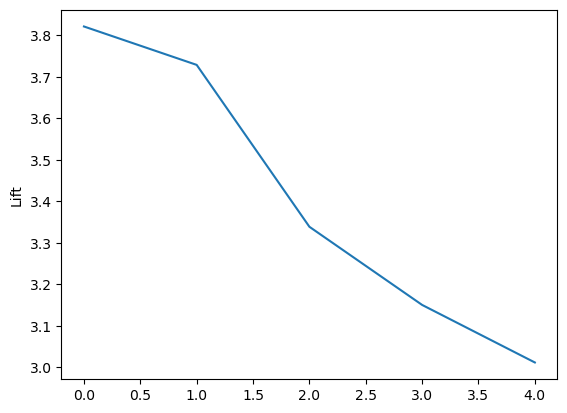

In [26]:
sns.lineplot(x=[0,1,2,3,4],y=final.Lift.head())

In [27]:
final.head()

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,canned fruit,coffee,0.002309,0.428571,3.728954
2,flour,mayonnaise,0.002309,0.063380,3.338599
3,sparkling wine,waffles,0.002565,0.217391,3.150154
4,rice,napkins,0.003079,0.244898,3.011395
